**1. Importing the necessary libraries**


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
%matplotlib inline
import cv2 

**2. Define the Logistic Regression model**


In [2]:
model = keras.Sequential([
    layers.Flatten(input_shape=(64, 64, 3)),
    layers.Dense(1, activation='sigmoid')
])

c:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**3. Compile the model**


In [3]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

**4. Load and preprocess the data**


In [4]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [5]:
training_set = train_datagen.flow_from_directory(
    "casting/train",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 6633 images belonging to 2 classes.


In [6]:
test_set = test_datagen.flow_from_directory(
    "casting/test",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 715 images belonging to 2 classes.


**5. Train the model**


In [7]:
result = model.fit(
    training_set,
    epochs=10,
    validation_data=test_set
    
)

Epoch 1/10


c:\Users\asus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


208/208 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.6861 - loss: 0.6441 - val_accuracy: 0.7650 - val_loss: 0.4910
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7600 - loss: 0.5000 - val_accuracy: 0.7273 - val_loss: 0.5231
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7757 - loss: 0.4673 - val_accuracy: 0.8168 - val_loss: 0.4115
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7853 - loss: 0.4586 - val_accuracy: 0.8308 - val_loss: 0.3936
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7846 - loss: 0.4576 - val_accuracy: 0.8084 - val_loss: 0.4005
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7951 - loss: 0.4286 - val_accuracy: 0.8266 - val_loss: 0.3743
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7942 - loss: 0.4393 - val_accuracy: 0.8210 - val_loss: 0.3742
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8204 - loss: 0.4047 - val_accuracy: 0.714

**6. Plotting the training and validation loss**


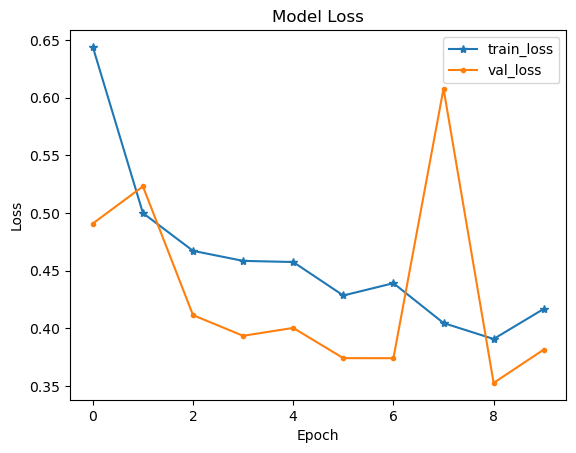

In [8]:
plt.plot(result.history['loss'], label='train_loss',marker = '*')
plt.plot(result.history['val_loss'], label='val_loss',marker = '.')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**7. Plotting the training and validation accuracy**


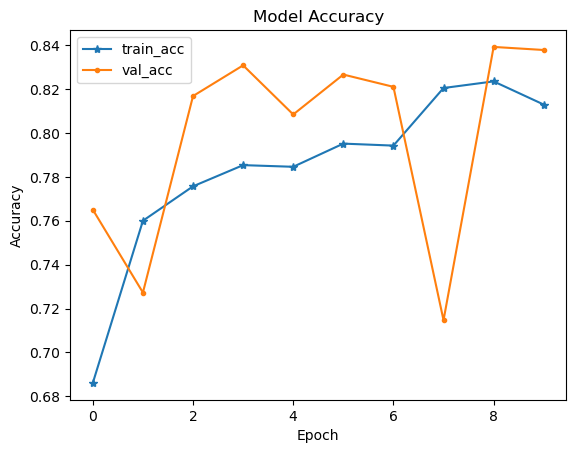

In [9]:
plt.plot(result.history['accuracy'], label='train_acc',marker = '*')
plt.plot(result.history['val_accuracy'], label='val_acc',marker = '.')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**8. Save the model**


In [10]:
import os
os.chdir(os.getcwd())

In [11]:
model.save('logistic_regression_model.keras')

**9. Define a function to make predictions using the saved model**


In [12]:
model = keras.models.load_model('logistic_regression_model.keras')

In [13]:
def model_output(path):
    img = keras.preprocessing.image.load_img(path, target_size=(64, 64))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) / 255.
    prob = model.predict(img_array)[0][0]
    plt.imshow(plt.imread(path))
    print('Probability:', prob)
    if prob > 0.5:
        print("Casting is ok ")
    else:
        print("Casting is defective")

**10. Use the function to make a prediction**


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Probability: 0.015818926
Casting is defective


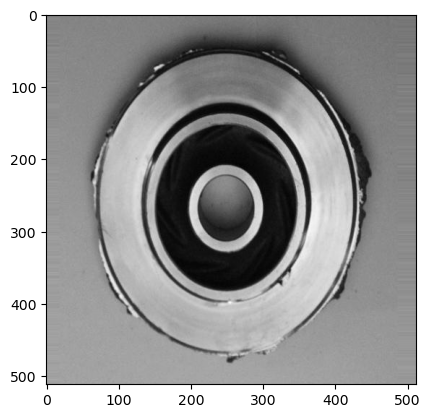

In [14]:
model_output("casting/casting_image/def_front/cast_def_0_0.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Probability: 0.2309695
Casting is defective


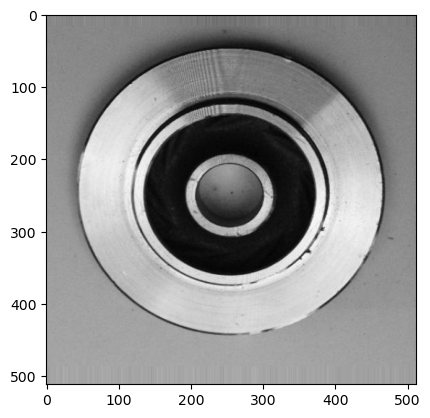

In [15]:
model_output("casting/casting_512x512/def_front/cast_def_0_240.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Probability: 0.9448004
Casting is ok 


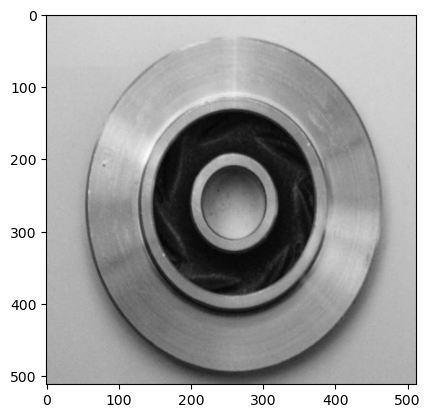

In [16]:
model_output("casting/casting_512x512/ok_front/cast_ok_0_35.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Probability: 0.9829836
Casting is ok 


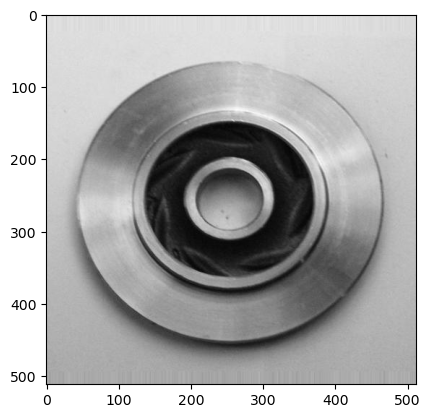

In [17]:
model_output("casting/casting_512x512/ok_front/cast_ok_0_601.jpeg")